In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle competitions download -c dogs-vs-cats

In [ ]:
! mkdir train

In [37]:
! unzip train.zip -d train

Archive:  train.zip
replace train/train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [38]:
! mkdir cats_and_dogs_small

! mkdir cats_and_dogs_small/train
! mkdir cats_and_dogs_small/validation
! mkdir cats_and_dogs_small/test

! mkdir cats_and_dogs_small/train/cats
! mkdir cats_and_dogs_small/validation/cats
! mkdir cats_and_dogs_small/test/cats

! mkdir cats_and_dogs_small/train/dogs
! mkdir cats_and_dogs_small/validation/dogs
! mkdir cats_and_dogs_small/test/dogs

mkdir: cannot create directory ‘cats_and_dogs_small’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/train’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/validation’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/test’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/train/cats’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/validation/cats’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/test/cats’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/train/dogs’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/validation/dogs’: File exists
mkdir: cannot create directory ‘cats_and_dogs_small/test/dogs’: File exists


In [39]:
import os, shutil

original_dataset_dir = '/content/train/train'

base_dir = '/content/cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [40]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [41]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [42]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [43]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [44]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [45]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [46]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [47]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [48]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [49]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [50]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [51]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [53]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [54]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [56]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [57]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 54s 93ms/step - loss: 0.6938 - acc: 0.5110 - val_loss: 0.6876 - val_acc: 0.5020
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6675 - acc: 0.6027 - val_loss: 0.6385 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6084 - acc: 0.6684 - val_loss: 0.6540 - val_acc: 0.6020
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5681 - acc: 0.7103 - val_loss: 0.6248 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5279 - acc: 0.7269 - val_loss: 0.5964 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5079 - acc: 0.7586 - val_loss: 0.5948 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4792 - acc: 0.7776 - val_loss: 0.5831 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 9s 86ms/step -

In [58]:
model.save('cats_and_dogs_small_1.h5')

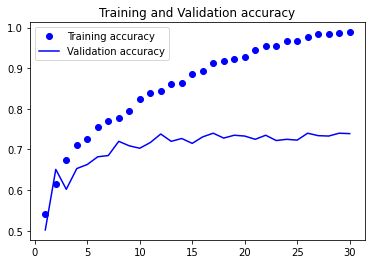

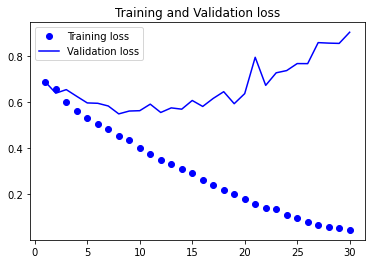

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [60]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

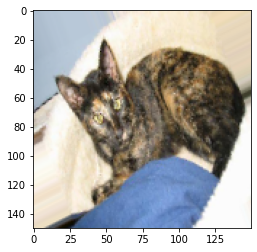

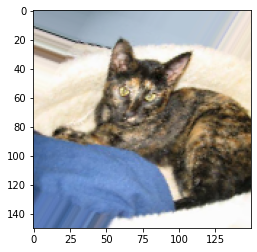

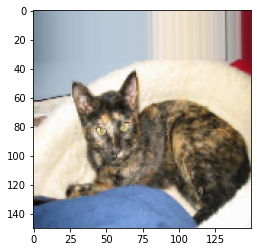

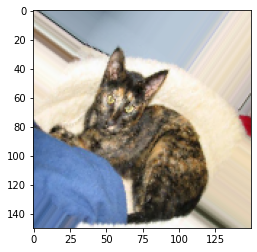

In [61]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [62]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

In [63]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [64]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [65]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 186ms/step - loss: 0.6969 - acc: 0.5067 - val_loss: 0.6791 - val_acc: 0.5740
Epoch 2/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6843 - acc: 0.5639 - val_loss: 0.6691 - val_acc: 0.5450
Epoch 3/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6655 - acc: 0.5729 - val_loss: 0.6458 - val_acc: 0.6160
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.6539 - acc: 0.5980 - val_loss: 0.6521 - val_acc: 0.5700
Epoch 5/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6341 - acc: 0.6261 - val_loss: 0.6210 - val_acc: 0.6510
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6222 - acc: 0.6541 - val_loss: 0.6177 - val_acc: 0.6540
Epoch 7/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6191 - acc: 0.6463 - val_loss: 0.6155 - val_acc: 0.6560
Epoch 8/100
100/100 [===========================

In [66]:
model.save('cats_and_dogs_small_2.h5')

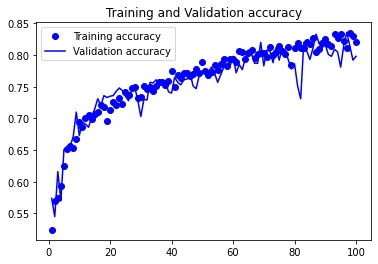

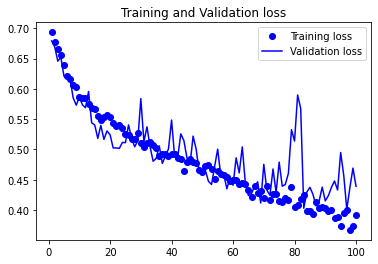

In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()